The goal is to predict the potential high-valued costumers.

In [1]:
# Import necessary packages 

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Importing datasets

df = pd.read_csv('act_train.csv')
people = pd.read_csv('people.csv')

In [4]:
people.head(10)

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,...,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,...,False,False,True,False,False,False,True,True,False,84
5,ppl_10001,type 2,group 25417,type 3,2022-10-14,type 6,type 6,type 4,type 1,type 1,...,False,True,True,True,True,True,True,True,True,90
6,ppl_100010,type 2,group 17304,type 2,2022-09-01,type 8,type 7,type 8,type 1,type 7,...,False,False,False,False,False,False,False,False,False,2
7,ppl_100013,type 2,group 4204,type 3,2023-01-24,type 4,type 8,type 4,type 1,type 7,...,False,False,True,True,True,True,False,True,True,91
8,ppl_100019,type 2,group 45749,type 3,2023-03-26,type 40,type 25,type 9,type 3,type 9,...,False,False,False,False,False,False,False,False,False,84
9,ppl_100025,type 2,group 36096,type 3,2022-08-26,type 14,type 6,type 8,type 3,type 9,...,False,False,False,False,False,False,False,False,False,76


In [7]:
# Explroing the shape of the datasets

print('Shape of df', df.shape)
print('Shape of people', people.shape)

Shape of df (2197291, 15)
Shape of people (189118, 41)


In [8]:
# The missing data from df
print(df.isnull().sum()/df.shape[0])

people_id            0.000000
activity_id          0.000000
date                 0.000000
activity_category    0.000000
char_1               0.928268
char_2               0.928268
char_3               0.928268
char_4               0.928268
char_5               0.928268
char_6               0.928268
char_7               0.928268
char_8               0.928268
char_9               0.928268
char_10              0.071732
outcome              0.000000
dtype: float64


In [9]:
# The missing data from people
print(people.isnull().sum()/people.shape[0])

people_id    0.0
char_1       0.0
group_1      0.0
char_2       0.0
date         0.0
char_3       0.0
char_4       0.0
char_5       0.0
char_6       0.0
char_7       0.0
char_8       0.0
char_9       0.0
char_10      0.0
char_11      0.0
char_12      0.0
char_13      0.0
char_14      0.0
char_15      0.0
char_16      0.0
char_17      0.0
char_18      0.0
char_19      0.0
char_20      0.0
char_21      0.0
char_22      0.0
char_23      0.0
char_24      0.0
char_25      0.0
char_26      0.0
char_27      0.0
char_28      0.0
char_29      0.0
char_30      0.0
char_31      0.0
char_32      0.0
char_33      0.0
char_34      0.0
char_35      0.0
char_36      0.0
char_37      0.0
char_38      0.0
dtype: float64


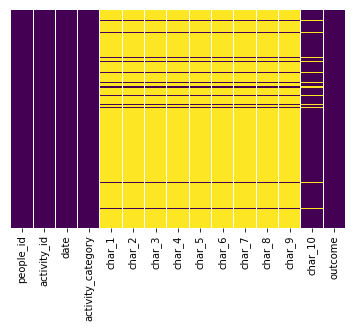

In [10]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False ,cmap = 'viridis')

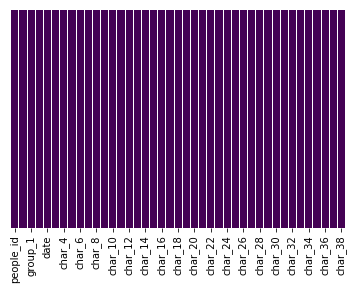

In [11]:
sns.heatmap(people.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [12]:
#Create the list of columns to drop from activity data
columns_to_remove = ["char_"+str(x) for x in np.arange(1,10)]
print("Columns to remove:",columns_to_remove)

Columns to remove: ['char_1', 'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8', 'char_9']


In [13]:
#Remove the columns from the activity data
df = df[list(set(df.columns) - set(columns_to_remove))]

In [14]:
#Rename the 2 columns to avoid name clashes in merged data
df = df.rename(columns={"date":"activity_date","char_10":"activity_type"})

In [15]:
#Replace nulls in the activity_type column with the mode
df["activity_type"] = df["activity_type"].fillna(df["activity_type"].mode()[0])

In [16]:
#Print the shape of the final activity dataset
print("Shape of DF:",df.shape)

Shape of DF: (2197291, 6)


In [17]:
#Merge the 2 datasets on 'people_id' key
df_new = df.merge(people,on=["people_id"],how="inner")
print("Shape before merging:",df.shape)
print("Shape after merging :",df_new.shape)

Shape before merging: (2197291, 6)
Shape after merging : (2197291, 46)


In [20]:
df_new.head(3)

,people_id,activity_id,outcome,activity_type,activity_date,activity_category,char_1,group_1,char_2,date,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,act2_1734928,0,type 76,2023-08-26,type 4,type 2,group 17304,type 2,2021-06-29,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100,act2_2434093,0,type 1,2022-09-27,type 2,type 2,group 17304,type 2,2021-06-29,...,False,True,True,False,False,True,True,True,False,36
2,ppl_100,act2_3404049,0,type 1,2022-09-27,type 2,type 2,group 17304,type 2,2021-06-29,...,False,True,True,False,False,True,True,True,False,36


Setting baseline for the model. 

In [21]:
print("Unique values for outcome:",df_new["outcome"].unique())
print("\nPercentage of distribution for outcome-")
print(df_new["outcome"].value_counts()/df_new.shape[0])

Unique values for outcome: [0 1]

Percentage of distribution for outcome-
0    0.556046
1    0.443954
Name: outcome, dtype: float64


In [22]:
print("Distinct DataTypes:",list(df_new.dtypes.unique()))

Distinct DataTypes: [dtype('O'), dtype('int64'), dtype('bool')]


In [23]:
#Create a temp dataset with the datatype of columns
temp = pd.DataFrame(df_new.dtypes)
temp.columns = ["DataType"]
temp

,DataType
people_id,object
activity_id,object
outcome,int64
activity_type,object
activity_date,object
activity_category,object
char_1,object
group_1,object
char_2,object
date,object


In [25]:
#Create a list with names of all Boolean columns
boolean_columns = temp.index[temp["DataType"] == 'bool'].values
print("Boolean columns - \n",boolean_columns)
#Convert all boolean columns to Binary numeric values
for column in boolean_columns:
    df_new[column] = np.where(df_new[column] == True,1,0)
print("\nDistinct DataTypes after processing:",df.dtypes.unique())

Boolean columns - 
 ['char_10' 'char_11' 'char_12' 'char_13' 'char_14' 'char_15' 'char_16'
 'char_17' 'char_18' 'char_19' 'char_20' 'char_21' 'char_22' 'char_23'
 'char_24' 'char_25' 'char_26' 'char_27' 'char_28' 'char_29' 'char_30'
 'char_31' 'char_32' 'char_33' 'char_34' 'char_35' 'char_36' 'char_37']

Distinct DataTypes after processing: [dtype('O') dtype('int64')]


In [28]:
#Extracting the object columns from the above dataframe
categorical_columns = temp.index[temp["DataType"] == 'O'].values
categorical_columns

array(['people_id', 'activity_id', 'activity_type', 'activity_date',
       'activity_category', 'char_1', 'group_1', 'char_2', 'date',
       'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8',
       'char_9'], dtype=object)

In [29]:
#Check the number of distinct values in each categorical column
for column in categorical_columns:
    print(column+" column has :",str(len(df_new[column].unique()))+" distinct values")

people_id column has : 151295 distinct values
activity_id column has : 2197291 distinct values
activity_type column has : 6515 distinct values
activity_date column has : 411 distinct values
activity_category column has : 7 distinct values
char_1 column has : 2 distinct values
group_1 column has : 29899 distinct values
char_2 column has : 3 distinct values
date column has : 1196 distinct values
char_3 column has : 43 distinct values
char_4 column has : 25 distinct values
char_5 column has : 9 distinct values
char_6 column has : 7 distinct values
char_7 column has : 25 distinct values
char_8 column has : 8 distinct values
char_9 column has : 9 distinct values


In [30]:
#Create date related features for 'date' in customer data
df_new["date"] = pd.to_datetime(df_new["date"])
df_new["Year"] = df_new["date"].dt.year
df_new["Month"] = df_new["date"].dt.month
df_new["Quarter"] = df_new["date"].dt.quarter
df_new["Week"] = df_new["date"].dt.week
df_new["WeekDay"] = df_new["date"].dt.weekday
df_new["Day"] = df_new["date"].dt.day

In [31]:
df_new[['Year', 'Month',
       'Quarter', 'Week', 'WeekDay', 'Day']]

,Year,Month,Quarter,Week,WeekDay,Day
0,2021,6,2,26,1,29
1,2021,6,2,26,1,29
2,2021,6,2,26,1,29
3,2021,6,2,26,1,29
4,2021,6,2,26,1,29
5,2021,6,2,26,1,29
6,2021,1,1,1,2,6
7,2021,1,1,1,2,6
8,2022,6,2,23,4,10
9,2022,6,2,23,4,10


In [32]:
df_new.columns

Index(['people_id', 'activity_id', 'outcome', 'activity_type', 'activity_date',
       'activity_category', 'char_1', 'group_1', 'char_2', 'date', 'char_3',
       'char_4', 'char_5', 'char_6', 'char_7', 'char_8', 'char_9', 'char_10',
       'char_11', 'char_12', 'char_13', 'char_14', 'char_15', 'char_16',
       'char_17', 'char_18', 'char_19', 'char_20', 'char_21', 'char_22',
       'char_23', 'char_24', 'char_25', 'char_26', 'char_27', 'char_28',
       'char_29', 'char_30', 'char_31', 'char_32', 'char_33', 'char_34',
       'char_35', 'char_36', 'char_37', 'char_38', 'Year', 'Month', 'Quarter',
       'Week', 'WeekDay', 'Day'],
      dtype='object')

In [33]:
df_new['WeekDay'].unique()

array([1, 2, 4, 6, 5, 3, 0], dtype=int64)

In [34]:
#Create date related features for 'date' in activity data
df_new["activity_date"] = pd.to_datetime(df_new["activity_date"])
df_new["Activity_Year"] = df_new["activity_date"].dt.year
df_new["Activity_Month"] = df_new["activity_date"].dt.month
df_new["Activity_Quarter"] = df_new["activity_date"].dt.quarter
df_new["Activity_Week"] = df_new["activity_date"].dt.week
df_new["Activity_WeekDay"] = df_new["activity_date"].dt.weekday
df_new["Activity_Day"] = df_new["activity_date"].dt.day

In [35]:
#Delete the original date columns
del(df_new["date"])
del(df_new["activity_date"])
print("Shape of data after create Date Features:",df_new.shape)

Shape of data after create Date Features: (2197291, 56)


In [36]:
# Remaining categorical columns
print(df_new[["people_id","activity_type","activity_id","group_1"]].head())

  people_id activity_type   activity_id      group_1
0   ppl_100       type 76  act2_1734928  group 17304
1   ppl_100        type 1  act2_2434093  group 17304
2   ppl_100        type 1  act2_3404049  group 17304
3   ppl_100        type 1  act2_3651215  group 17304
4   ppl_100        type 1  act2_4109017  group 17304


In [37]:
#For people ID, we would need to extract values after '_'
df_new.people_id = df_new.people_id.apply(lambda x:x.split("_")[1])
df_new.people_id = pd.to_numeric(df_new.people_id)

In [38]:
#For activity ID also, we would need to extract values after '_'
df_new.activity_id = df_new.activity_id.apply(lambda x:x.split("_")[1])
df_new.activity_id = pd.to_numeric(df_new.activity_id)

In [39]:
#For group_1 , we would need to extract values after " ""
df_new.group_1 = df_new.group_1.apply(lambda x:x.split(" ")[1])
df_new.group_1 = pd.to_numeric(df_new.group_1)

In [40]:
#For activity_type , we would need to extract values after " 
df_new.activity_type = df_new.activity_type.apply(lambda x:x.split(" ")[1])
df_new.activity_type = pd.to_numeric(df_new.activity_type)

In [41]:
#Double check the new values in the dataframe
print(df_new[["people_id","activity_type","activity_id","group_1"]].head())

   people_id  activity_type  activity_id  group_1
0      100.0             76    1734928.0    17304
1      100.0              1    2434093.0    17304
2      100.0              1    3404049.0    17304
3      100.0              1    3651215.0    17304
4      100.0              1    4109017.0    17304


In [42]:
# categorical columns, which have relatively low numbers of distinct values, to one-hot encoded
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [43]:
#Define a function that will intake the raw dataframe and the column name and return a one hot encoded DF
def create_ohe(df, col):
    le = LabelEncoder()
    a=le.fit_transform(df[col]).reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    column_names = [col+ "_"+ str(i) for i in le.classes_]
    return(pd.DataFrame(ohe.fit_transform(a),columns =column_names))

In [69]:
#Since the above function converts the column, one at a time
#I create a loop to create the final dataset with all features
target = ["outcome"]
numeric_columns = list(set(temp.index[(temp.dtypes =="float64") | (temp.dtypes =="int64")].values) - set(target))
temp = df_new[numeric_columns]
for column in categorical_columns:
    temp_df = create_ohe(df_new,column)
    temp = pd.concat([temp,temp_df],axis=1)
print("\nShape of final df after onehot encoding:",temp.shape)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 46 but corresponding boolean dimension is 1

In [60]:
numeric_columns = list(set(temp.index[(temp.dtypes =="float64") | (temp.dtypes =="int64")].values))
numeric_columns                 

IndexError: boolean index did not match indexed array along dimension 0; dimension is 46 but corresponding boolean dimension is 1

In [65]:
df_new.dtypes

outcome                int64
people_id            float64
activity_id          float64
activity_type          int64
activity_category     object
char_1                object
group_1                int64
char_2                object
char_3                object
char_4                object
char_5                object
char_6                object
char_7                object
char_8                object
char_9                object
char_10                int32
char_11                int32
char_12                int32
char_13                int32
char_14                int32
char_15                int32
char_16                int32
char_17                int32
char_18                int32
char_19                int32
char_20                int32
char_21                int32
char_22                int32
char_23                int32
char_24                int32
char_25                int32
char_26                int32
char_27                int32
char_28                int32
char_29       

In [68]:
df_new.index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            2197281, 2197282, 2197283, 2197284, 2197285, 2197286, 2197287,
            2197288, 2197289, 2197290],
           dtype='int64', length=2197291)